## Part1. import keras

In [1]:
import tensorflow.keras as keras
keras.__version__

'2.4.0'

## Part2. 神經網路用於二分類資料(NN)

#### import IMDB資料
keras內建，電影評論的資料

In [2]:
from keras.datasets import imdb

# 分為train_x, train_y, test_x, test_y
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) 

#### 資料處理

In [3]:
# word_index 是一個 dictionary,將單字指向一個整數Index 
word_index = imdb.get_word_index()

# 改為Index指向文字
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [4]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [5]:
import numpy as np

# 設定特定index的值為1，其餘為0
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  
    return results

#  training data
x_train = vectorize_sequences(train_data)
#  test data
x_test = vectorize_sequences(test_data)

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### 開始用keras建立模型!

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers

# 建立Sequential模型
model = models.Sequential() 

#增加 Layers
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
# 決定優化器、損失函數、評估模型準則
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
from tensorflow.keras import optimizers
# 不同的優化器
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
# 另一種寫法
from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [11]:
# 從training data中切出validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
# Fit 模型
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.5143 - binary_accuracy: 0.7862 - val_loss: 0.3854 - val_binary_accuracy: 0.8710
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3080 - binary_accuracy: 0.9011 - val_loss: 0.3048 - val_binary_accuracy: 0.8889
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2261 - binary_accuracy: 0.9270 - val_loss: 0.3156 - val_binary_accuracy: 0.8717
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1778 - binary_accuracy: 0.9439 - val_loss: 0.3385 - val_binary_accuracy: 0.8618
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1458 - binary_accuracy: 0.9523 - val_loss: 0.2811 - val_binary_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1199 - binary_accuracy: 0.9637 - val_loss: 0.3033 - val_binary_accuracy: 0.8810
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - los

In [13]:
# 模型的loss, accuracy結果
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [14]:
history_dict

{'loss': [0.5142524242401123,
  0.3079788386821747,
  0.22607578337192535,
  0.17776800692081451,
  0.14575526118278503,
  0.11991435289382935,
  0.10049885511398315,
  0.08112245053052902,
  0.06972577422857285,
  0.056788988411426544,
  0.04553046077489853,
  0.036101385951042175,
  0.030953234061598778,
  0.023990020155906677,
  0.020926740020513535,
  0.013072841800749302,
  0.01058219000697136,
  0.010245462879538536,
  0.010107015259563923,
  0.004097853787243366],
 'binary_accuracy': [0.7861999869346619,
  0.9010666608810425,
  0.9269999861717224,
  0.9439333081245422,
  0.9522666931152344,
  0.9636666774749756,
  0.9709333181381226,
  0.9765999913215637,
  0.9810000061988831,
  0.986133337020874,
  0.9892666935920715,
  0.9926000237464905,
  0.9938666820526123,
  0.9958000183105469,
  0.9959333539009094,
  0.9987333416938782,
  0.9992666840553284,
  0.9988666772842407,
  0.998533308506012,
  0.9998000264167786],
 'val_loss': [0.3853524327278137,
  0.304841011762619,
  0.3156428

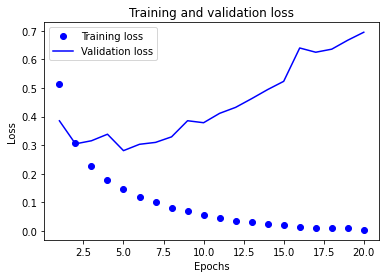

In [15]:
# 以圖形呈現loss變化

import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

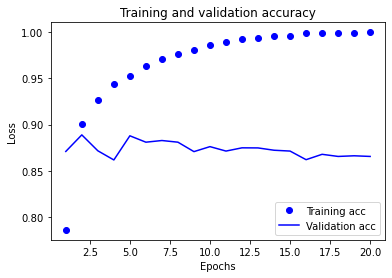

In [16]:
# 以圖形呈現accuracy變化

plt.clf()   
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [17]:
# 放入testing data，計算testing data的loss和accuracy
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 1s 1ms/step - loss: 0.7642 - binary_accuracy: 0.8490


[0.7641991376876831, 0.8489999771118164]

In [18]:
# testing data的實際預測值
model.predict(x_test)

array([[0.00760239],
       [1.        ],
       [0.84162843],
       ...,
       [0.00149763],
       [0.00895464],
       [0.6957792 ]], dtype=float32)

### Overfitting and Underfitting

In [19]:
# 原模型，同上的model

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [20]:
# 減少layers輸出的節點個數，結構較簡單的模型

smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [21]:
# fit原模型
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 67ms/step - loss: 0.4498 - acc: 0.8243 - val_loss: 0.3390 - val_acc: 0.8781
Epoch 2/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2627 - acc: 0.9092 - val_loss: 0.2875 - val_acc: 0.8877
Epoch 3/20
49/49 [==============================] - 1s 14ms/step - loss: 0.2034 - acc: 0.9266 - val_loss: 0.2860 - val_acc: 0.8844
Epoch 4/20
49/49 [==============================] - 1s 14ms/step - loss: 0.1690 - acc: 0.9401 - val_loss: 0.2906 - val_acc: 0.8849
Epoch 5/20
49/49 [==============================] - 1s 14ms/step - loss: 0.1458 - acc: 0.9501 - val_loss: 0.3252 - val_acc: 0.8748
Epoch 6/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1283 - acc: 0.9561 - val_loss: 0.3441 - val_acc: 0.8714
Epoch 7/20
49/49 [==============================] - 1s 14ms/step - loss: 0.1123 - acc: 0.9609 - val_loss: 0.4027 - val_acc: 0.8593
Epoch 8/20
49/49 [==============================] - 1s 14ms/step - loss: 0.0974 - a

In [22]:
# fit較簡單的模型
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 64ms/step - loss: 0.6931 - acc: 0.4944 - val_loss: 0.6902 - val_acc: 0.6081
Epoch 2/20
49/49 [==============================] - 1s 14ms/step - loss: 0.6426 - acc: 0.7538 - val_loss: 0.6019 - val_acc: 0.7493
Epoch 3/20
49/49 [==============================] - 1s 13ms/step - loss: 0.5551 - acc: 0.8282 - val_loss: 0.5423 - val_acc: 0.8494
Epoch 4/20
49/49 [==============================] - 1s 14ms/step - loss: 0.4975 - acc: 0.8622 - val_loss: 0.5041 - val_acc: 0.8572
Epoch 5/20
49/49 [==============================] - 1s 13ms/step - loss: 0.4568 - acc: 0.8881 - val_loss: 0.4786 - val_acc: 0.8661
Epoch 6/20
49/49 [==============================] - 1s 13ms/step - loss: 0.4267 - acc: 0.9046 - val_loss: 0.4618 - val_acc: 0.8799
Epoch 7/20
49/49 [==============================] - 1s 13ms/step - loss: 0.4022 - acc: 0.9183 - val_loss: 0.4526 - val_acc: 0.8640
Epoch 8/20
49/49 [==============================] - 1s 13ms/step - loss: 0.3807 - a

In [23]:
# 計算兩模型validation loss
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

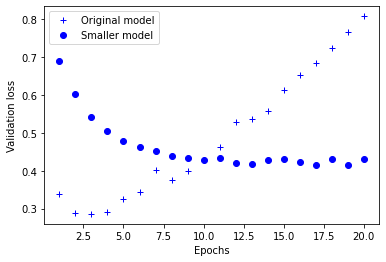

In [24]:
# 以圖形呈現兩模型validation loss的變化

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


In [25]:
# 增加layers輸出的節點個數，結構較複雜的模型
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [26]:
# fit較複雜的模型

bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 7s 140ms/step - loss: 0.4652 - acc: 0.7906 - val_loss: 0.2847 - val_acc: 0.8836
Epoch 2/20
49/49 [==============================] - 4s 83ms/step - loss: 0.2170 - acc: 0.9145 - val_loss: 0.3032 - val_acc: 0.8748
Epoch 3/20
49/49 [==============================] - 4s 89ms/step - loss: 0.1309 - acc: 0.9524 - val_loss: 0.3070 - val_acc: 0.8853
Epoch 4/20
49/49 [==============================] - 4s 87ms/step - loss: 0.0585 - acc: 0.9826 - val_loss: 0.4407 - val_acc: 0.8808
Epoch 5/20
49/49 [==============================] - 4s 86ms/step - loss: 0.0702 - acc: 0.9864 - val_loss: 0.4727 - val_acc: 0.8814
Epoch 6/20
49/49 [==============================] - 4s 87ms/step - loss: 0.0023 - acc: 0.9998 - val_loss: 0.6874 - val_acc: 0.8815
Epoch 7/20
49/49 [==============================] - 4s 88ms/step - loss: 0.1089 - acc: 0.9888 - val_loss: 0.6825 - val_acc: 0.8619
Epoch 8/20
49/49 [==============================] - 5s 94ms/step - loss: 7.2797e-0

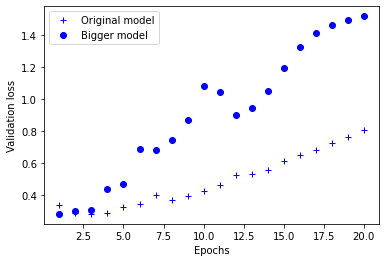

In [27]:
# 以圖形呈現兩模型validation loss的變化
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

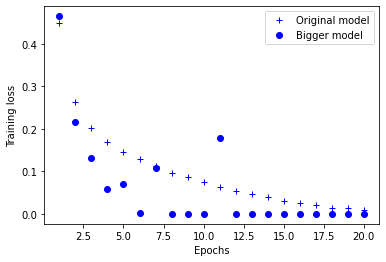

In [28]:
# 以圖形呈現兩模型training loss的變化

original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

### Regularization 正規化方法

In [29]:
from tensorflow.keras import regularizers

# 在model中，加上L1或L2的penalty

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

In [30]:
# 同樣IMDB的例子

from tensorflow.keras import regularizers

# 加上L2 penalty

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [31]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [32]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 81ms/step - loss: 0.5087 - acc: 0.8215 - val_loss: 0.4062 - val_acc: 0.8692
Epoch 2/20
49/49 [==============================] - 1s 24ms/step - loss: 0.3326 - acc: 0.9035 - val_loss: 0.3465 - val_acc: 0.8856
Epoch 3/20
49/49 [==============================] - 1s 17ms/step - loss: 0.2853 - acc: 0.9152 - val_loss: 0.3543 - val_acc: 0.8759
Epoch 4/20
49/49 [==============================] - 1s 17ms/step - loss: 0.2641 - acc: 0.9238 - val_loss: 0.3329 - val_acc: 0.8872
Epoch 5/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2475 - acc: 0.9306 - val_loss: 0.3418 - val_acc: 0.8824
Epoch 6/20
49/49 [==============================] - 1s 14ms/step - loss: 0.2396 - acc: 0.9346 - val_loss: 0.3623 - val_acc: 0.8759
Epoch 7/20
49/49 [==============================] - 1s 14ms/step - loss: 0.2346 - acc: 0.9354 - val_loss: 0.3513 - val_acc: 0.8814
Epoch 8/20
49/49 [==============================] - 1s 14ms/step - loss: 0.2269 - a

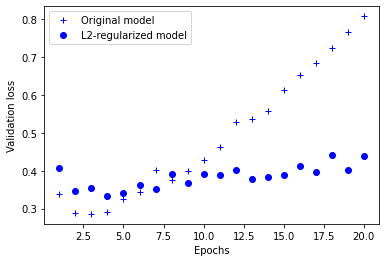

In [33]:
# 圖形呈現原模型和做完正規化後模型的validation loss差異

l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

## Part3. 使用keras處理影像資料(CNN)

* 使用貓狗圖片辨識資料集
* 2000張train data, 1000張test data(貓狗圖片皆一半)
* 原始資料來源: https://www.kaggle.com/c/dogs-vs-cats/data
* 整理後的小資料集: https://drive.google.com/drive/folders/1i4MsLRIPTgIRkZq0CvweOBTSH4tVOO3A?usp=sharing

### (1) 使用生成器做預處理
* https://keras.io/api/preprocessing/image/
* https://blog.csdn.net/mieleizhi0522/article/details/82191331

In [ ]:
# 需先至上面網址下載小資料集才可順利執行
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'train_data'
validation_dir = 'validation_data'

dataGen = ImageDataGenerator(rescale = 1.0/255)

train_generator = dataGen.flow_from_directory(train_dir, 
                                              target_size = (150, 150), 
                                              batch_size = 20,
                                              class_mode = 'binary')
validation_generator = dataGen.flow_from_directory(validation_dir,
                                                   target_size = (150, 150), 
                                                   batch_size = 20,
                                                   class_mode = 'binary')

In [43]:
# 把生成結果儲存到指定資料夾的版本

# train_generator_save = dataGen.flow_from_directory(train_dir, 
#                                               target_size = (150, 150), 
#                                               batch_size = 20,
#                                               class_mode = 'binary',
#                                               save_to_dir = r'C:/成大/1091巨量資料/keras/response',
#                                               save_format = 'jpg')

# for i in range(1):
#     train_generator_save.next()

### (2) 使用一個單純的CNN架構

In [44]:
# add

from tensorflow.keras import layers
from tensorflow.keras import models

model_CNN = models.Sequential()
model_CNN.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model_CNN.add(layers.MaxPooling2D((2, 2)))
model_CNN.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_CNN.add(layers.MaxPooling2D((2, 2)))
model_CNN.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_CNN.add(layers.MaxPooling2D((2, 2)))
model_CNN.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_CNN.add(layers.MaxPooling2D((2, 2)))

model_CNN.add(layers.Flatten())
model_CNN.add(layers.Dense(512, activation='relu'))
model_CNN.add(layers.Dense(1, activation='sigmoid'))

model_CNN.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)      

In [45]:
# compile

from tensorflow.keras import optimizers

model_CNN.compile(loss = 'binary_crossentropy',
                  optimizer = optimizers.RMSprop(lr = 1e-4),
                  metrics = ['acc'])

In [46]:
# fit

history = model_CNN.fit_generator(train_generator,
                              steps_per_epoch = 100, # 2000 / 20 = 100
                              epochs = 30,
                              validation_data = validation_generator,
                              validation_steps = 50) # 1000 / 20 = 50

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 37s 370ms/step - loss: 0.6886 - acc: 0.5435 - val_loss: 0.6697 - val_acc: 0.5450
Epoch 2/30
100/100 [==============================] - 35s 354ms/step - loss: 0.6547 - acc: 0.6095 - val_loss: 0.6393 - val_acc: 0.6170
Epoch 3/30
100/100 [==============================] - 34s 340ms/step - loss: 0.6013 - acc: 0.6755 - val_loss: 0.6281 - val_acc: 0.6360
Epoch 4/30
100/100 [==============================] - 34s 341ms/step - loss: 0.5647 - acc: 0.7030 - val_loss: 0.5913 - val_acc: 0.6680
Epoch 5/30
100/100 [==============================] - 34s 343ms/step - loss: 0.5357 - acc: 0.7285 - val_loss: 0.5822 - val_acc: 0.6750
Epoch 6/30
100/100 [==============================] - 34s 342ms/step - loss: 0.5011 - acc: 0.7505 - val_loss: 0.6132 - val_acc: 0.6770
Epoch 7/30
100/100 [==============================] - 35s 354ms/step - loss: 0.4783 - acc: 0.7625 - val_loss: 0.56

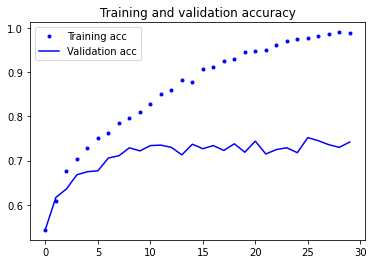

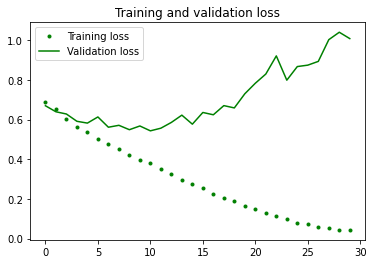

In [47]:
# 視覺化訓練結果

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b.', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g.', label = 'Training loss')
plt.plot(epochs, val_loss, 'g', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### (3) 使用圖像增強(data augumentation)，並在模型中加入Dropout層

In [48]:
dataGen_augmetation = ImageDataGenerator(rotation_range = 40,
                                         width_shift_range = 0.2,
                                         height_shift_range = 0.2,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True,
                                         fill_mode = 'nearest')

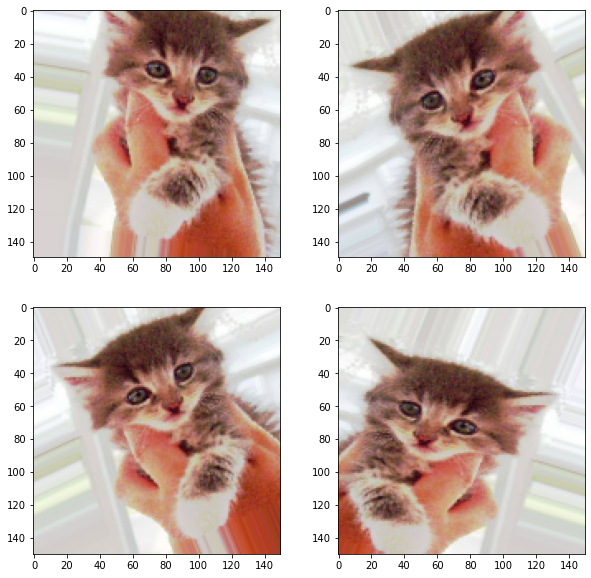

In [49]:
# 展示某張圖的圖像增強結果

from tensorflow.keras.preprocessing import image

img = image.load_img('train_data/cats/cat.100.jpg', target_size = (150, 150))

# reshape成(1, 150, 150, 3)的numpy array
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

# 圖像增強生成器
i = 0
plt.figure(figsize = (10, 10))
for batch in dataGen_augmetation.flow(x, batch_size = 1): # flow()裡面要放一張目標圖片
    # plt.figure(i)
    plt.subplot(2, 2, i + 1)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [50]:
# 加入dropout層的model

model_CNN_dropout = models.Sequential()

model_CNN_dropout.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model_CNN_dropout.add(layers.MaxPooling2D((2, 2)))
model_CNN_dropout.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_CNN_dropout.add(layers.MaxPooling2D((2, 2)))
model_CNN_dropout.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_CNN_dropout.add(layers.MaxPooling2D((2, 2)))
model_CNN_dropout.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_CNN_dropout.add(layers.MaxPooling2D((2, 2)))

# flatten之後加入dropout層, 0.5代表有隨機選50%的元素, 讓他變成0
model_CNN_dropout.add(layers.Flatten())
model_CNN_dropout.add(layers.Dropout(0.5))
model_CNN_dropout.add(layers.Dense(512, activation='relu'))
model_CNN_dropout.add(layers.Dense(1, activation='sigmoid'))

model_CNN_dropout.compile(loss='binary_crossentropy',
                          optimizer=optimizers.RMSprop(lr=1e-4),
                          metrics=['acc'])

In [51]:
# 將圖像增強生成器與CNN連接並訓練

# 注意!!!!!只有train data要用圖像增強
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = 'train_data'
validation_dir = 'validation_data'

train_generator_aug = train_datagen.flow_from_directory(train_dir,
                                                        target_size = (150, 150),
                                                        batch_size = 32,
                                                        class_mode = 'binary')
validation_generator_aug = test_datagen.flow_from_directory(validation_dir,
                                                        target_size = (150, 150),
                                                        batch_size = 32,
                                                        class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [52]:
history_Aug_dropout = model_CNN_dropout.fit_generator(train_generator_aug,
                              steps_per_epoch = 30,
                              epochs = 30,
                              validation_data = validation_generator_aug,
                              validation_steps = 20)

Epoch 1/30
30/30 [==============================] - 18s 599ms/step - loss: 0.6923 - acc: 0.5281 - val_loss: 0.6957 - val_acc: 0.4891
Epoch 2/30
30/30 [==============================] - 17s 581ms/step - loss: 0.6934 - acc: 0.5240 - val_loss: 0.6931 - val_acc: 0.5031
Epoch 3/30
30/30 [==============================] - 17s 575ms/step - loss: 0.6852 - acc: 0.5466 - val_loss: 0.6810 - val_acc: 0.5422
Epoch 4/30
30/30 [==============================] - 17s 581ms/step - loss: 0.6851 - acc: 0.5417 - val_loss: 0.6786 - val_acc: 0.5656
Epoch 5/30
30/30 [==============================] - 17s 566ms/step - loss: 0.6867 - acc: 0.5413 - val_loss: 0.6818 - val_acc: 0.5219
Epoch 6/30
30/30 [==============================] - 17s 573ms/step - loss: 0.6826 - acc: 0.5656 - val_loss: 0.6671 - val_acc: 0.5766
Epoch 7/30
30/30 [==============================] - 17s 566ms/step - loss: 0.6833 - acc: 0.5698 - val_loss: 0.6679 - val_acc: 0.5516
Epoch 8/30
30/30 [==============================] - 17s 568ms/step - 

In [53]:
history_Aug_dropout.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

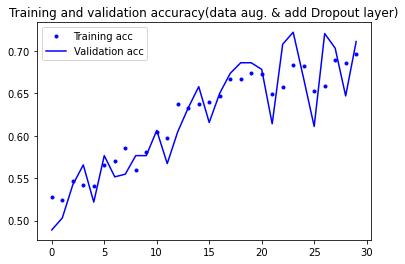

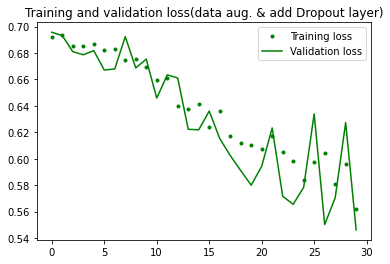

In [54]:
# 視覺化訓練結果

import matplotlib.pyplot as plt

acc = history_Aug_dropout.history['acc']
val_acc = history_Aug_dropout.history['val_acc']
loss = history_Aug_dropout.history['loss']
val_loss = history_Aug_dropout.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b.', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy(data aug. & add Dropout layer)')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g.', label = 'Training loss')
plt.plot(epochs, val_loss, 'g', label = 'Validation loss')
plt.title('Training and validation loss(data aug. & add Dropout layer)')
plt.legend()

plt.show()

### (4) 視覺化訓練過程 

In [55]:
# model簡介

model_CNN_dropout.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [56]:
# 將模型實例化, 使其可以input一個圖片張量, output模型前8層layer的結果

from tensorflow.keras import models

layer_outputs = [layer.output for layer in model_CNN_dropout.layers[:8]]

# Model()可以允許一個input, 多個output, 例如activation_model的output就是8個numpy arrary
activation_model = models.Model(inputs = model_CNN_dropout.input, outputs = layer_outputs)

In [57]:
# 使用一張validation data的圖, 看看其中卷積層的輸出長啥樣

from keras.preprocessing.image import image
import numpy as np

img = image.load_img('validation_data/cats/cat.1058.jpg', target_size = (150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor /= 225.0
print('img_tensor shape =', img_tensor.shape)

activations = activation_model.predict(img_tensor) # 將圖片放入模型

first_layer_activation = activations[0]
print('first_layer_activation shape =', first_layer_activation.shape)

img_tensor shape = (1, 150, 150, 3)
first_layer_activation shape = (1, 148, 148, 32)


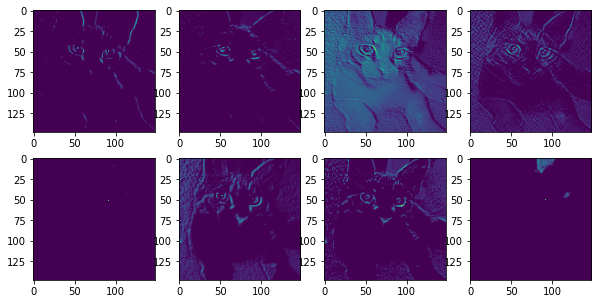

In [58]:
# 把第一個layer的前8個feature map畫出來看看

plt.figure(figsize = (10, 5))
for i in range(1, 9, 1):
    plt.subplot(2, 4, i)
    plt.imshow(first_layer_activation[0, :, :, i], cmap = 'viridis')

C:\Users\cyclo\anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


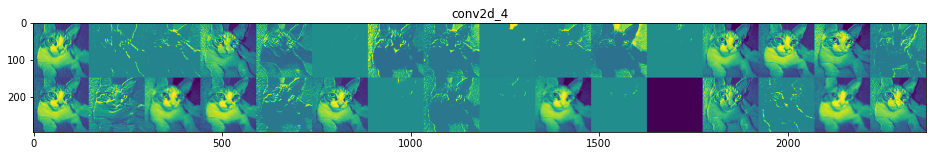

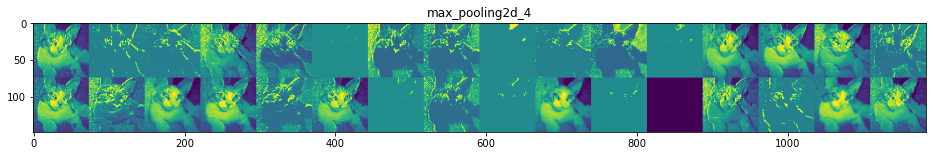

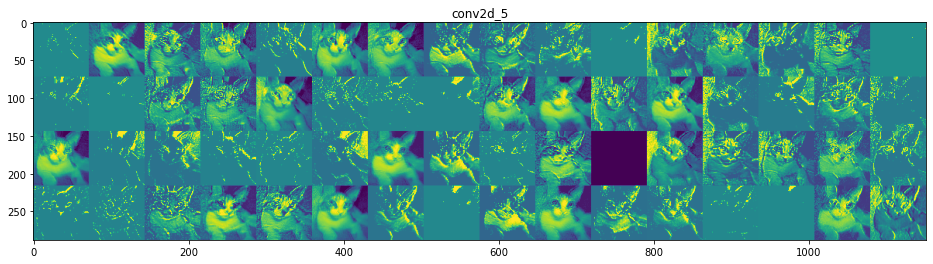

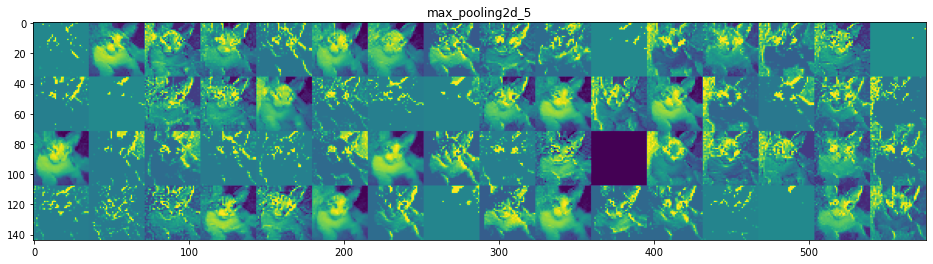

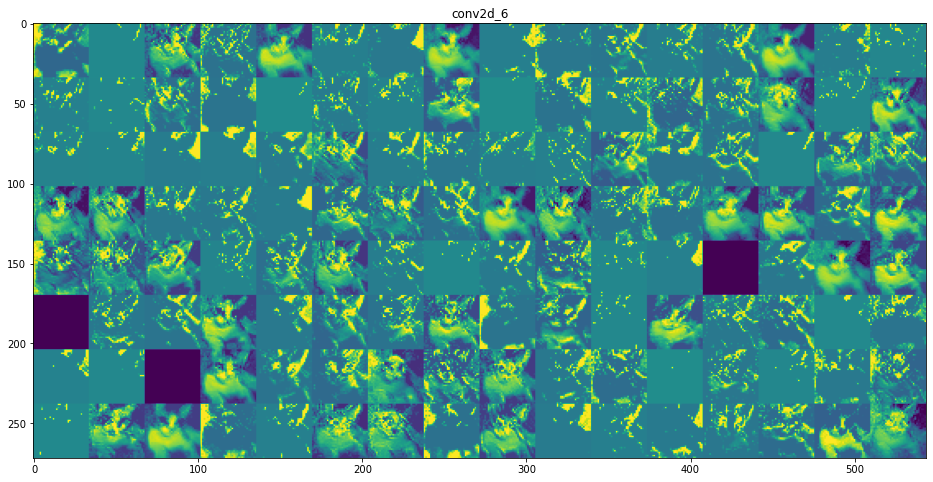

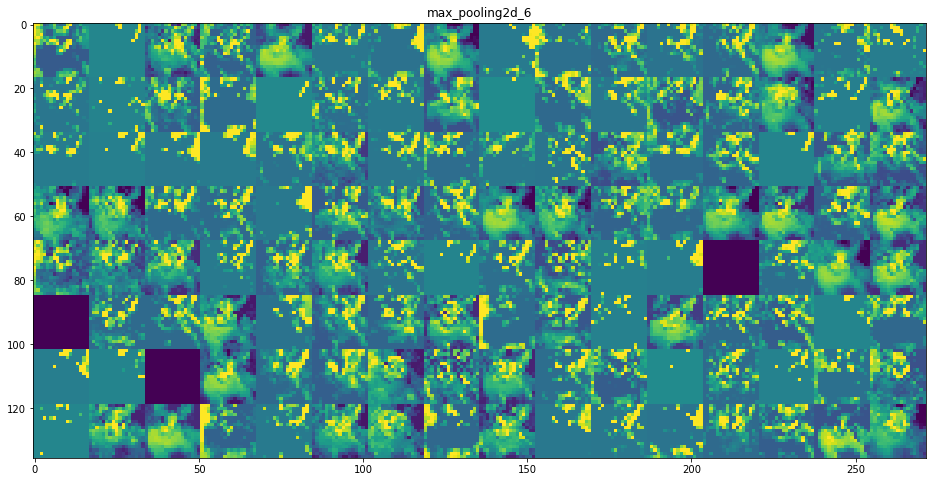

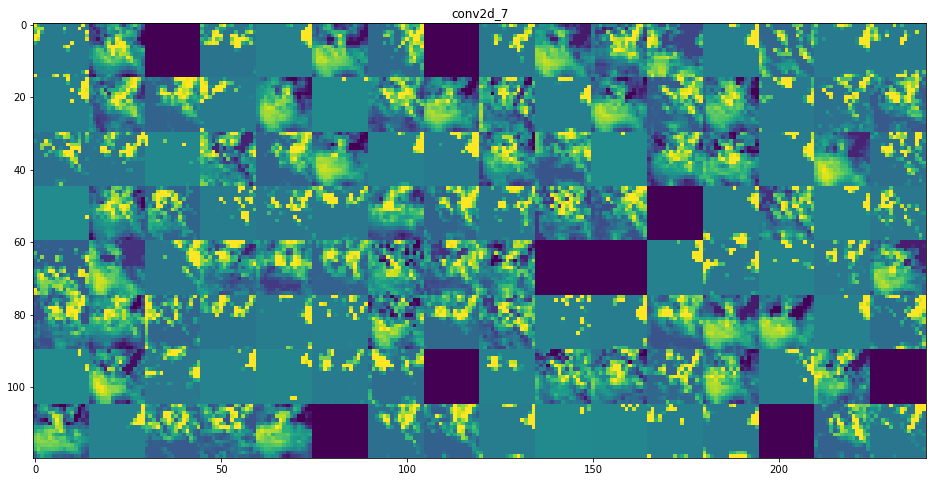

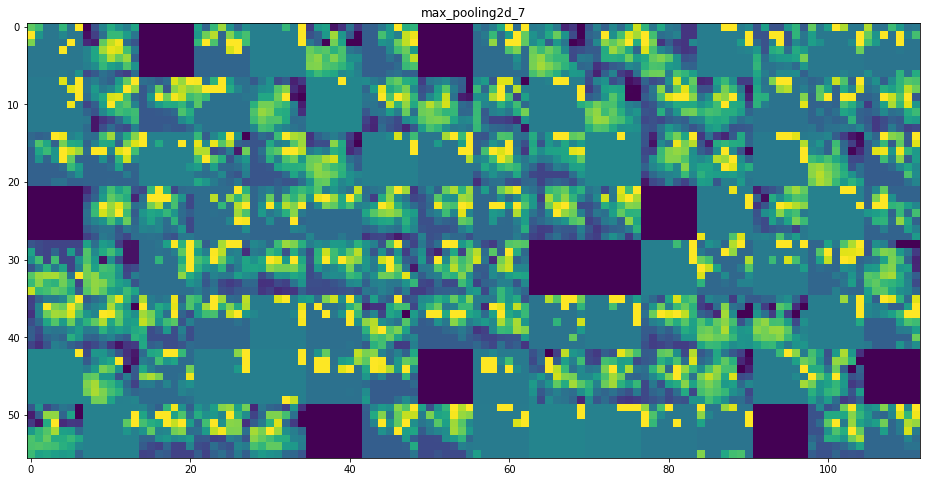

In [59]:
# 畫出全部layer的結果

layer_names = []
for layer in model_CNN_dropout.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

i = 0
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')
    plt.savefig("{}.png".format(i))
    i += 1
    
plt.show()

## Part4. 生成式深度學習

In [60]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.applications import inception_v3
from IPython.display import Image, display

base_image_path = keras.utils.get_file("cat_test.jpg", "https://i.imgur.com/eepifJ3.jpg")
result_prefix = "cat_dream"

# These are the names of the layers
# for which we try to maximize activation,
# as well as their weight in the final loss
# we try to maximize.
# You can tweak these setting to obtain new visual effects.
layer_settings = {
    "mixed4": 1.0,
    "mixed5": 1.5,
    "mixed6": 2.0,
    "mixed7": 2.5,
}

# Playing with these hyperparameters will also allow you to achieve new effects
step = 0.01  # Gradient ascent step size
num_octave = 3  # Number of scales at which to run gradient ascent
octave_scale = 1.4  # Size ratio between scales
iterations = 20  # Number of ascent steps per scale
max_loss = 15.0

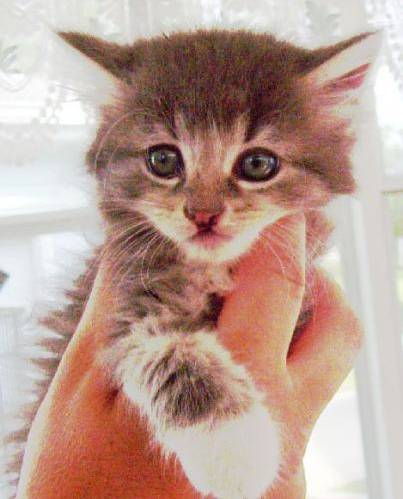

In [61]:
display(Image(base_image_path))

In [62]:
def preprocess_image(image_path):
    # Util function to open, resize and format pictures
    # into appropriate arrays.
    img = keras.preprocessing.image.load_img(image_path)
    img = keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = inception_v3.preprocess_input(img)
    return img


def deprocess_image(x):
    # Util function to convert a NumPy array into a valid image.
    x = x.reshape((x.shape[1], x.shape[2], 3))
    # Undo inception v3 preprocessing
    x /= 2.0
    x += 0.5
    x *= 255.0
    # Convert to uint8 and clip to the valid range [0, 255]
    x = np.clip(x, 0, 255).astype("uint8")
    return x

In [63]:
# Build an InceptionV3 model loaded with pre-trained ImageNet weights
model = inception_v3.InceptionV3(weights="imagenet", include_top=False)

# Get the symbolic outputs of each "key" layer (we gave them unique names).
outputs_dict = dict(
    [
        (layer.name, layer.output)
        for layer in [model.get_layer(name) for name in layer_settings.keys()]
    ]
)

# Set up a model that returns the activation values for every target layer
# (as a dict)
feature_extractor = keras.Model(inputs=model.inputs, outputs=outputs_dict)

In [64]:
def compute_loss(input_image):
    features = feature_extractor(input_image)
    # Initialize the loss
    loss = tf.zeros(shape=())
    for name in features.keys():
        coeff = layer_settings[name]
        activation = features[name]
        # We avoid border artifacts by only involving non-border pixels in the loss.
        scaling = tf.reduce_prod(tf.cast(tf.shape(activation), "float32"))
        loss += coeff * tf.reduce_sum(tf.square(activation[:, 2:-2, 2:-2, :])) / scaling
    return loss

In [65]:
@tf.function
def gradient_ascent_step(img, learning_rate):
    with tf.GradientTape() as tape:
        tape.watch(img)
        loss = compute_loss(img)
    # Compute gradients.
    grads = tape.gradient(loss, img)
    # Normalize gradients.
    grads /= tf.maximum(tf.reduce_mean(tf.abs(grads)), 1e-6)
    img += learning_rate * grads
    return loss, img


def gradient_ascent_loop(img, iterations, learning_rate, max_loss=None):
    for i in range(iterations):
        loss, img = gradient_ascent_step(img, learning_rate)
        if max_loss is not None and loss > max_loss:
            break
        print("... Loss value at step %d: %.2f" % (i, loss))
    return img


In [66]:
original_img = preprocess_image(base_image_path)
original_shape = original_img.shape[1:3]

successive_shapes = [original_shape]
for i in range(1, num_octave):
    shape = tuple([int(dim / (octave_scale ** i)) for dim in original_shape])
    successive_shapes.append(shape)
successive_shapes = successive_shapes[::-1]
shrunk_original_img = tf.image.resize(original_img, successive_shapes[0])

img = tf.identity(original_img)  # Make a copy
for i, shape in enumerate(successive_shapes):
    print("Processing octave %d with shape %s" % (i, shape))
    img = tf.image.resize(img, shape)
    img = gradient_ascent_loop(
        img, iterations=iterations, learning_rate=step, max_loss=max_loss
    )
    upscaled_shrunk_original_img = tf.image.resize(shrunk_original_img, shape)
    same_size_original = tf.image.resize(original_img, shape)
    lost_detail = same_size_original - upscaled_shrunk_original_img

    img += lost_detail
    shrunk_original_img = tf.image.resize(original_img, shape)

keras.preprocessing.image.save_img(result_prefix + ".png", deprocess_image(img.numpy()))

Processing octave 0 with shape (254, 205)
... Loss value at step 0: 0.74
... Loss value at step 1: 1.10
... Loss value at step 2: 1.38
... Loss value at step 3: 1.60
... Loss value at step 4: 1.83
... Loss value at step 5: 2.05
... Loss value at step 6: 2.22
... Loss value at step 7: 2.44
... Loss value at step 8: 2.57
... Loss value at step 9: 2.80
... Loss value at step 10: 2.87
... Loss value at step 11: 3.07
... Loss value at step 12: 3.18
... Loss value at step 13: 3.29
... Loss value at step 14: 3.43
... Loss value at step 15: 3.58
... Loss value at step 16: 3.70
... Loss value at step 17: 3.83
... Loss value at step 18: 3.96
... Loss value at step 19: 4.03
Processing octave 1 with shape (356, 287)
... Loss value at step 0: 1.02
... Loss value at step 1: 1.46
... Loss value at step 2: 1.73
... Loss value at step 3: 1.96
... Loss value at step 4: 2.14
... Loss value at step 5: 2.35
... Loss value at step 6: 2.56
... Loss value at step 7: 2.73
... Loss value at step 8: 2.88
... Los

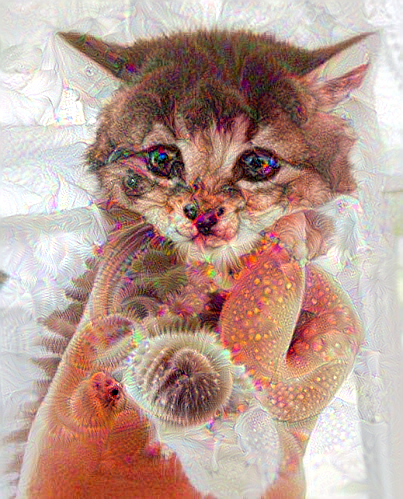

In [67]:
display(Image(result_prefix + ".png"))